# The zero-temperature structure of a White Dwarf
Juan Pablo Castro and Yannik leitlein

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Contants
A = 6.022e22 #cgs
B = 9.74e5#cgs
G = 6.674e-8


#Parameters
miu_e = 2 #two nucleons per electron
rho_o = 3e6 # average density of Sirius B en cgs  # Se puede mejorar esta 
 

# computational parameters
n = 1e-7 # limit for P(r)/Pc to stop computation


 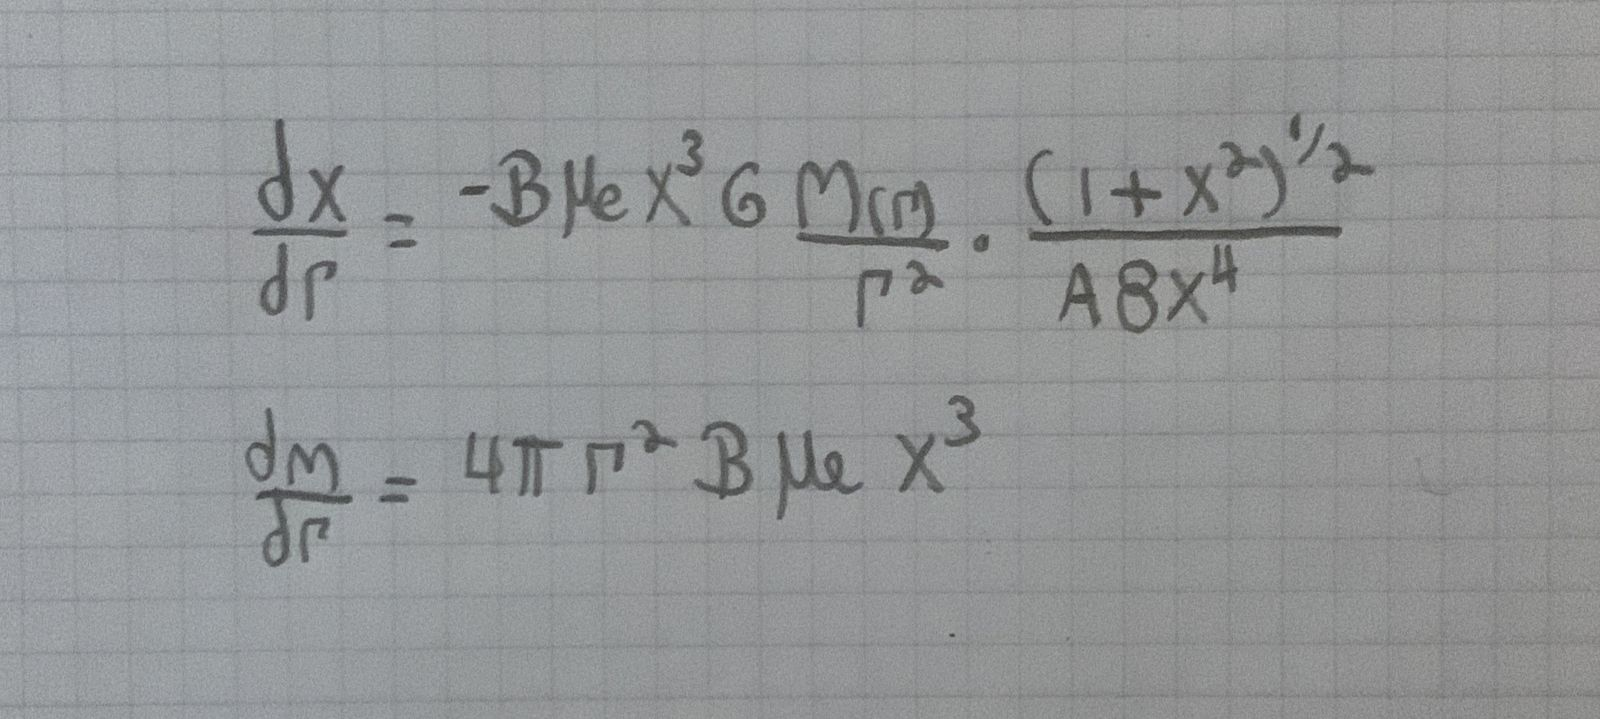

In [16]:
# Condiciones iniciales

m_o = 4/3*np.pi*rho_o  #r_o = 1

x_o = (rho_o/(B*miu_e))**(1/3)
print(rho_o,x_o)

3000000.0 1.154810615366039


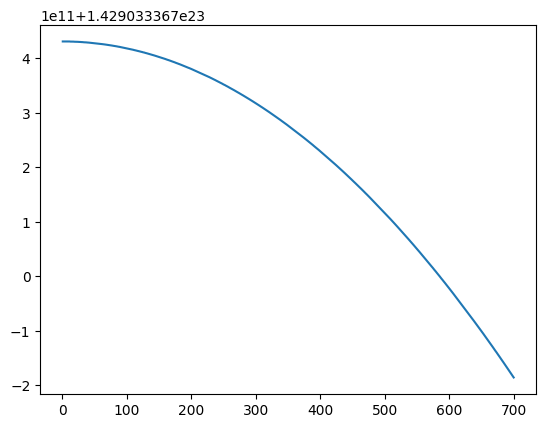

[3000000.         3000000.         3000000.         3000000.
 3000000.         3000000.         3000000.         3000000.
 3000000.         3000000.         3000000.         3000000.
 3000000.         3000000.         3000000.         3000000.
 3000000.         3000000.         3000000.         3000000.
 3000000.         3000000.         3000000.         3000000.
 3000000.         2999999.99999999 2999999.99999999 2999999.99999999
 2999999.99999999 2999999.99999999 2999999.99999999 2999999.99999999
 2999999.99999999 2999999.99999999 2999999.99999999 2999999.99999999
 2999999.99999999 2999999.99999999 2999999.99999999 2999999.99999999
 2999999.99999999 2999999.99999999 2999999.99999999 2999999.99999998
 2999999.99999998 2999999.99999998 2999999.99999998 2999999.99999998
 2999999.99999998 2999999.99999998 2999999.99999998 2999999.99999998
 2999999.99999998 2999999.99999997 2999999.99999997 2999999.99999997
 2999999.99999997 2999999.99999997 2999999.99999997 2999999.99999997
 2999999.9999

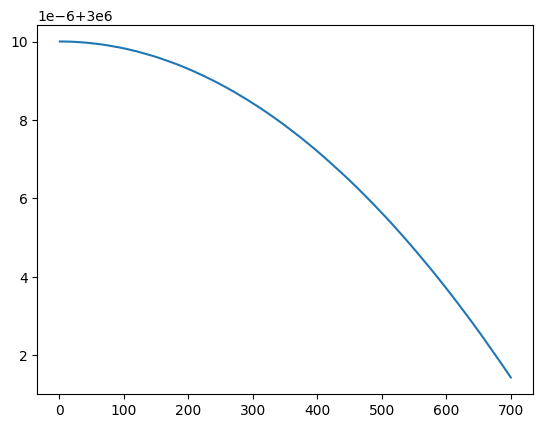

In [17]:
def System(r, c_o):
    x, m = c_o
    x_dot = ((-1)*B*miu_e*x**3 *G*m*(1+x**2)**(1/2))/(r**2 * A*8*x**4)
    m_dot = 4*np.pi*r**2 * B * miu_e*x**3

    return np.array([x_dot,m_dot])


c_o = np.array([x_o, m_o])
r = np.linspace(1,700,1000) # en centimetros creo, no se usa cero para evadir la singularidad
sol = solve_ivp( System, (r[0],r[-1]), c_o, t_eval = r, method = 'RK45' )

r = sol.t
x = sol.y[0]
rho = B*miu_e* x**3
Pe = A*(x*(2*x**2 -3)* (1+x**2)**(1/2)+ 3*np.arcsinh(x))
plt.plot(r, Pe)
plt.show()
plt.plot(r,rho)
print(rho)